In [1]:
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import rc_context

In [2]:
adata = sc.read('/lmh_data/data/sclab/syn22092838/snRNA_counts.mtx')
genes = pd.read_csv('/lmh_data/data/sclab/syn22092838/genes.csv', header=None)
scRNA_metadata = pd.read_csv('/lmh_data/data/sclab/syn22092838/snRNA_metadta.csv', index_col=0)

adata.obs_names = genes.values.reshape(-1)
adata.var = scRNA_metadata
adata = adata.T

adata = adata[adata.obs[adata.obs['celltype'].isin(['ASC'])].index,:]
adata

View of AnnData object with n_obs × n_vars = 4756 × 36114
    obs: 'Sample.ID', 'Batch', 'Sex', 'Age', 'Diagnosis', 'UMAP_1', 'UMAP_2', 'cluster', 'celltype'

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


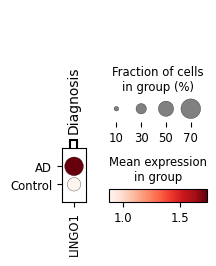

In [3]:
marker_genes_dict = {'Diagnosis': ['LINGO1']}
sc.pl.dotplot(adata, marker_genes_dict, groupby='Diagnosis')

In [4]:
train_set = np.load('/lmh_data/data/sclab/sclab/train_dataset.npy', allow_pickle=True)
scRNA_head = train_set[0]['scRNA_head']
gene_names = set(scRNA_head) & set(adata.var_names)
gene_names

{'DDX27',
 'VDAC1P1',
 'SEH1L',
 'RAMP1',
 'TBC1D21',
 'OLR1',
 'ABCC3',
 'MAPK1',
 'HSPB9',
 'DNASE1L1',
 'LINC00634',
 'KRT18P35',
 'RUFY4',
 'TSSK6',
 'CCNB3',
 'TERF1P2',
 'DLEC1',
 'STRA6',
 'SNX9',
 'HS6ST1',
 'CAMKK2',
 'HMGN5',
 'C1QC',
 'PTMAP6',
 'PSRC1',
 'SHARPIN',
 'CROCCP3',
 'FAM225B',
 'STAG1',
 'HHIPL1',
 'FLT4',
 'LRRC61',
 'GPRIN1',
 'SHKBP1',
 'SEC11C',
 'TMEM132D',
 'CSPP1',
 'FANK1',
 'VEZT',
 'RPL23AP67',
 'SEL1L2',
 'CACNA2D4',
 'ITGA3',
 'NUDT19',
 'KRT8P44',
 'FAM118A',
 'TOE1',
 'WDTC1',
 'RPL9P29',
 'SRD5A3',
 'FAM47E',
 'PRDM4',
 'MRPL24',
 'BTNL9',
 'ME2',
 'KCNJ9',
 'KIF9',
 'TMEM144',
 'ADAMTS5',
 'PFN4',
 'CPNE6',
 'HERC5',
 'PPP1R9A',
 'EIF1AD',
 'GHRL',
 'ZNF426',
 'IRGM',
 'KIAA1147',
 'MYO1C',
 'CEP152',
 'TRPM8',
 'MSR1',
 'NUDT22',
 'ERICH1',
 'PHKB',
 'TBC1D17',
 'MORC3',
 'PRDX4',
 'LINC00963',
 'ATIC',
 'DPYD-AS2',
 'PABPC1P7',
 'RBM8A',
 'SLC26A10',
 'BARD1',
 'HIBCH',
 'CHKB-CPT1B',
 'H1FOO',
 'NEK8',
 'RAB3IL1',
 'GRPEL2',
 'WDR74',
 'KCNAB1

In [5]:
rna = anndata.read_h5ad("/lmh_data/data/sclab/Human_M1_10x/scRNA.h5ad")
rna = rna[rna.obs['cell_type'].isin(['Astro']),:]
rna

View of AnnData object with n_obs × n_vars = 568 × 50281
    obs: 'cell_type', 'domain'

In [6]:
_rna = rna[:, list(gene_names)].copy()
_adata = adata[:, list(gene_names)].copy()

_adata.obs.loc[:, 'cell_type'] = _adata.obs.celltype
_rna.obs.loc[:, 'Diagnosis'] = 'Control'
_rna.obs.loc[:, 'dataset'] = 'Human_M1_10x'
_adata.obs.loc[:, 'dataset'] = 'syn22092838'

In [7]:
import scanorama
_combine = scanorama.correct_scanpy([_rna, _adata], return_dimred=True)
_combine

Found 20144 genes among all datasets
[[0.         0.81161972]
 [0.         0.        ]]
Processing datasets (0, 1)


/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanorama/scanorama.py:237: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(datasets[i])


[AnnData object with n_obs × n_vars = 568 × 20144
     obs: 'cell_type', 'domain', 'Diagnosis', 'dataset'
     obsm: 'X_scanorama',
 AnnData object with n_obs × n_vars = 4756 × 20144
     obs: 'Sample.ID', 'Batch', 'Sex', 'Age', 'Diagnosis', 'UMAP_1', 'UMAP_2', 'cluster', 'celltype', 'cell_type', 'dataset'
     obsm: 'X_scanorama']

In [8]:
_test = anndata.concat(_combine)
sc.pp.neighbors(_test, metric = "cosine", use_rep = "X_scanorama")

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be

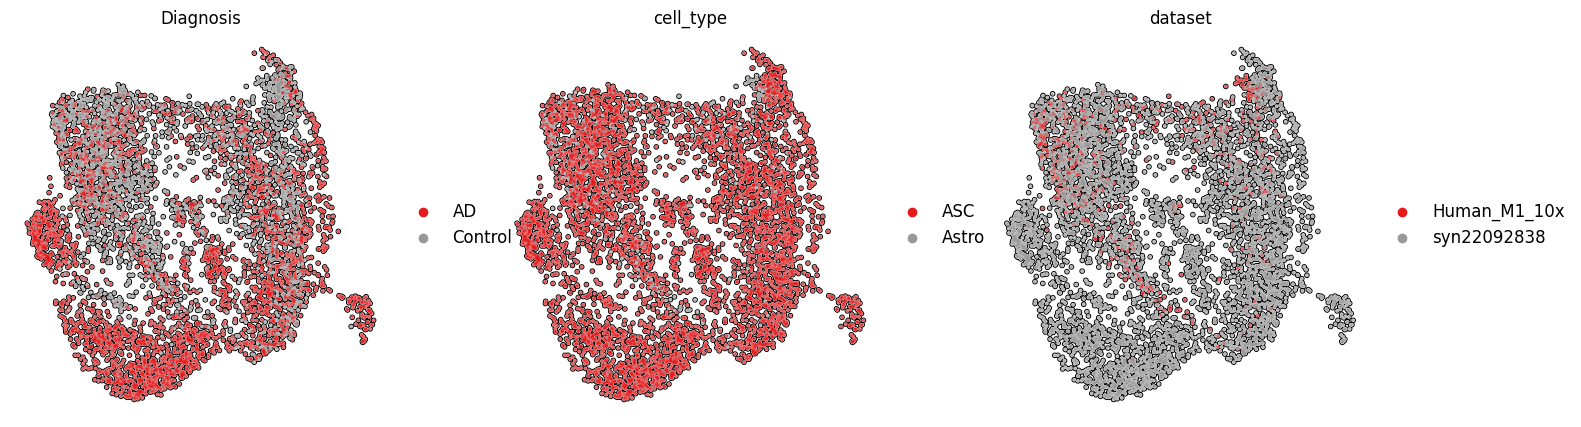

In [9]:
sc.tl.umap(_test)
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(_test, color=['Diagnosis', 'cell_type', 'dataset'], add_outline=True,
               legend_fontsize=12, legend_fontoutline=2, frameon=False, palette='Set1')

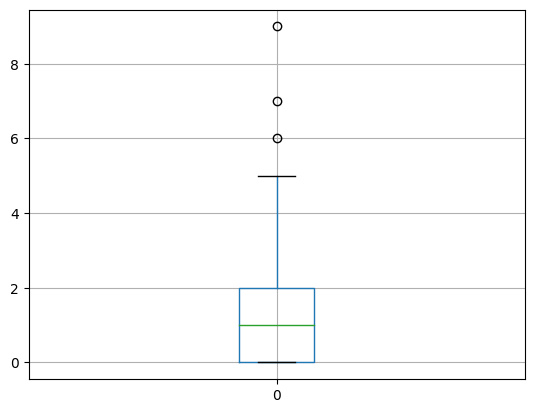

In [10]:
pd.DataFrame(_rna[:, 'LINGO1'].X.reshape(-1)).boxplot()
plt.show()

In [11]:
from sklearn.metrics.pairwise import cosine_distances

distances = 1 - cosine_distances(
    _combine[1].obsm["X_scanorama"],
    _combine[0].obsm["X_scanorama"],
)

def label_transfer(dist, labels):
    lab = pd.get_dummies(labels).to_numpy().T
    class_prob = lab @ dist
    norm = np.linalg.norm(class_prob, 2, axis=0)
    class_prob = class_prob / norm
    class_prob = (class_prob.T - class_prob.min(1)) / class_prob.ptp(1)
    return class_prob

class_prob = label_transfer(distances, _combine[1].obs.Diagnosis)
cp_df = pd.DataFrame(class_prob, columns=np.sort(_combine[1].obs.Diagnosis.unique()))
cp_df.index = _combine[0].obs.index
cp_df

,AD,Control
sample_name,,
AAGACTCAGGGAACAA-LKTX_190129_01_A01,0.999694,0.473829
ACCCAAACAAGAGGCT-LKTX_190129_01_A01,0.984883,0.615693
AGTACTGCAGATGCGA-LKTX_190129_01_A01,0.999942,0.499328
ATCGATGTCTGCGATA-LKTX_190129_01_A01,0.258183,0.936660
ATTTCACTCCGTGTGG-LKTX_190129_01_A01,0.999451,0.515432
...,...,...
TGTTCTAGTAGTGATA-LKTX_190130_01_H01,0.003447,0.551340
TTACAGGAGGAACATT-LKTX_190130_01_H01,0.000883,0.522067
TTCAGGATCGTGGGTC-LKTX_190130_01_H01,0.260753,0.938094


In [12]:
cp_df['Control-AD'] = cp_df['Control'] - cp_df['AD']
AD_index = cp_df.sort_values('Control-AD', ascending=True, inplace=False)[:50].index
control_index = cp_df.sort_values('Control-AD', ascending=False, inplace=False)[:50].index

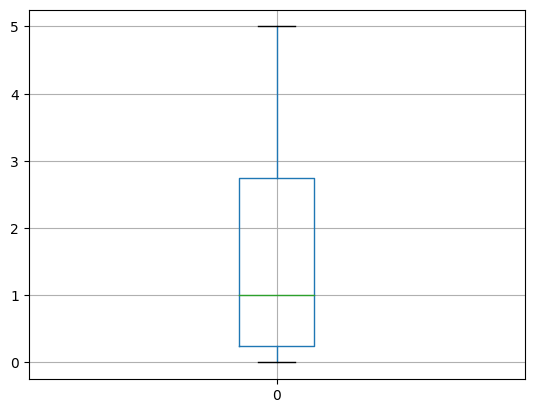

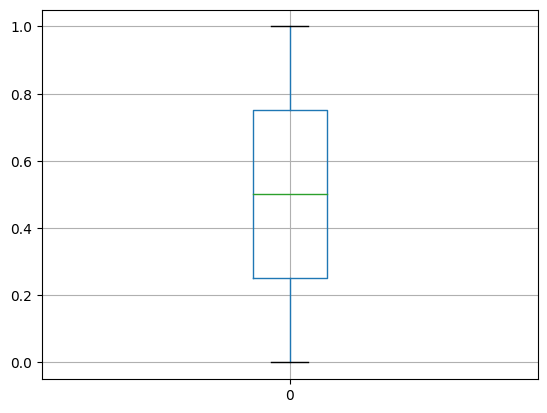

In [13]:
pd.DataFrame(rna[cp_df[(cp_df['AD']>0.99)&(cp_df['Control']<0.5)][:10].index, 'LINGO1'].X.reshape(-1)).boxplot()
plt.show()

pd.DataFrame(rna[cp_df[(cp_df['Control']>0.99)&(cp_df['AD']<0.5)][:10].index, 'LINGO1'].X.reshape(-1)).boxplot()
plt.show()

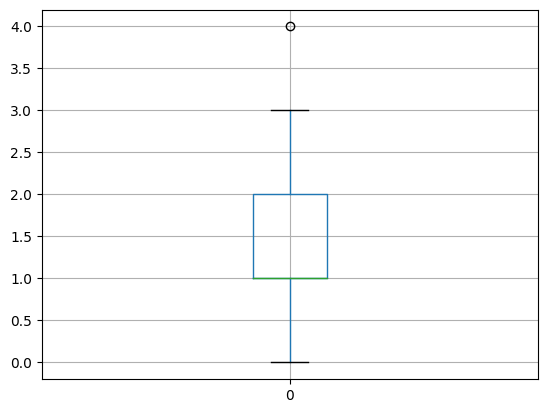

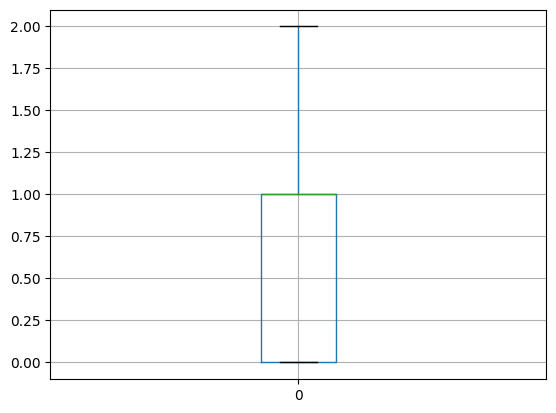

In [14]:
pd.DataFrame(rna[cp_df[cp_df['AD']>0.9].sort_values('Control-AD', ascending=True, inplace=False)[:10].index, 'LINGO1'].X.reshape(-1)).boxplot()
plt.show()

pd.DataFrame(rna[cp_df[cp_df['Control']>0.9].sort_values('Control-AD', ascending=False, inplace=False)[:10].index, 'LINGO1'].X.reshape(-1)).boxplot()
plt.show()

In [15]:
AD_index = cp_df[cp_df['AD']>0.9].sort_values('Control-AD', ascending=True, inplace=False)[:10].index
control_index = cp_df[cp_df['Control']>0.9].sort_values('Control-AD', ascending=False, inplace=False)[:10].index

print(AD_index)
print(control_index)

Index(['TGTTGAGGTCGAGATG-LKTX_190130_01_G01',
       'GTGATGTCAGAATTCC-LKTX_190130_01_B01',
       'CACTGAACAAACCGGA-LKTX_190130_01_F01',
       'CCGTTCAGTCGAACGA-LKTX_190129_01_C01',
       'TGATCTTCACTTGGGC-LKTX_190129_01_G01',
       'TTGTTTGAGGTCTGGA-LKTX_190130_01_H01',
       'GTACAACTCTCCCATG-LKTX_190129_01_D01',
       'GCCAACGAGATGCTGG-LKTX_190129_01_C01',
       'TGCAGATCAGCCTATA-LKTX_190129_01_A01',
       'CAGATTGAGGTCATAA-LKTX_190129_01_B01'],
      dtype='object', name='sample_name')
Index(['CGAGTTAGTGAGCAGT-LKTX_190129_01_A01',
       'TGATTCTCACAAGCTT-LKTX_190129_01_E01',
       'CATAGACCATGGTACT-LKTX_190130_01_G01',
       'CACTGTCTCTTCGGTC-LKTX_190129_01_G01',
       'AGCTCAACAGCTGTAT-LKTX_190129_01_F01',
       'GCAGTTACAATACGCT-LKTX_190129_01_E01',
       'ATCGATGTCTGCGATA-LKTX_190129_01_A01',
       'TTCAGGATCGTGGGTC-LKTX_190130_01_H01',
       'TCGCAGGAGCACTCAT-LKTX_190129_01_A01',
       'TGTCCTGCAGAGGTAC-LKTX_190130_01_B01'],
      dtype='object', name='sample_n

In [16]:
train_rna = anndata.read_h5ad("/lmh_data/data/sclab/sclab/rna_result.h5ad")

_dataset = []
def get_dataset(_indexs, Diagnosis):
    for _index in _indexs:
        _case = rna[_index, train_rna.var_names]
        _dataset.append({
            'scRNA': _case.X.toarray()[0].astype(np.int32),
            'scRNA_head': _case.var_names,
            'cell_type': _case.obs['cell_type'].values[0],
            'Diagnosis': Diagnosis,
        })
get_dataset(AD_index, 'AD')
get_dataset(control_index, 'control')
np.save('/lmh_data/data/sclab/sclab/AD/eval_dataset.npy', _dataset)